# Découverte de l'Océan : la circulation thermohaline

## Océanographie physique descriptive

L'océanographie descriptive approche l'océan à travers les observations et les sorties de modèles complexes et s'attache a comprendre le mouvement de l'océan de manière aussi quantitative que possible. Le but de ce TP est de vous familiariser avec l'océan global et de vous construire un sens physique de l'océan.
Dans un premier temps, on va s'intéresser aux propriétés clés de l'océan : la température et la salinité.

Par groupe de deux, vous allez choisir un basin parmis ceux cités ci-dessous :
-Océan Atlantique Nord
-Océan Atlantique Sud
-Océan Atlantique Tropical
-Océan Indien
-Océan Pacifique Nord
-Océan Pacifique Sud
-Océan Pacifique Tropical
-Océan Austral

### Temperature

- Importer les libraries


En python, comme dans beaucoup de logiciel de code, on va importer des librairies, c'est à dire un ensemble de fonctions sur un thème particulier. Ici, la librairie Cartopy sert à faire des cartes, matplotlib à faire des figures et numpy à faire du calcul mathématique. Seawater apporte plusieurs fonctions liées à l'océanopgraphie (calculer la densité à partir de T et S par exemple). NetCDF4 va permettre de charger les données stockées dans des fichiers netCDF, un format très utilisé en sciences du climat.

In [1]:
import cartopy.crs as m
import matplotlib.pyplot as plt
import numpy as np
import seawater as gsw
import netCDF4 as nc

- Lire les données du fichier netcdf

Le fichier woa13_15B2_s00v2.nc contient les données de salinité pour tout le globe, à 102 niveau de profondeurs, et à une résolution spatiale de 1°x1°. On va récupérer les variables latitude, longitude, pronfondeur, salinité dans ce fichier et la température dans le fichier woa13_A5B2_t00_01v2.nc.

In [2]:
#1° Resolution dataset
#fn='/Users/leaolivier/Documents/Monitorat/Océanographie/2019-2020/OceanoL3/Data/WOA/woa13_A5B2_s00_01v2.nc'

#5° Resolution dataset
fn='woa13_decav_s00_5dv2.nc'
#If you use the 5°resolution, change s_an by s_mn and t_an by t_mn

#Read the dataset and give information about the file, including the name of 
#the variables, you can print ds to see the informations
ds=nc.Dataset(fn)
#Create arrays with the variable of interest
lat=ds['lat'][:]
lon=ds['lon'][:]
depth=ds['depth'][:]
s_an=ds['s_mn'][:]
#fn='/Users/leaolivier/Documents/Monitorat/Océanographie/2019-2020/OceanoL3/Data/WOA/woa13_A5B2_t00_01v2.nc'
#5° Resolution dataset
fn='woa13_decav_t00_5dv2.nc'
ds=nc.Dataset(fn)
t_an=ds['t_mn'][:]
s_an=np.squeeze(s_an)
t_an=np.squeeze(t_an)


## Visualiser les données : la grande échelle

Faire une carte est la première façon de visualiser les données. On va donc dans un premier temps regarder la température et la salinité à la surface de l'océan.

### Salinité

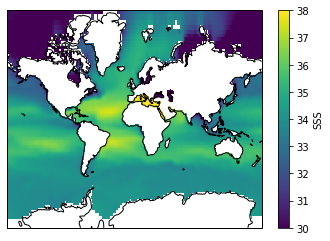

In [3]:
fig=plt.figure()
ax=plt.axes(projection=m.Mercator())
ca=ax.pcolormesh(lon,lat,s_an[0,:,:],transform=m.PlateCarree(),vmin=30, vmax=38)
cbar=fig.colorbar(ca)
cbar.set_label('SSS', rotation=90)
ax.coastlines()
ax.set_global()
plt.show()

Décrivez la carte de salinité de surface. Que nous apprend-t-elle ? Quels sont les processus faisant varier la salinité dans l'océan ? Peut-on en reconnaitre certaines ici ? Quel est l'océan le plus salé ? Y-a-t-il un lien avec la circulation océanique de surface ?

### Température

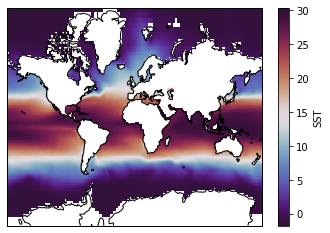

In [4]:
SSTfig=plt.figure()
ax=plt.axes(projection=m.Mercator())
c2=ax.pcolormesh(lon,lat,t_an[0,:,:],transform=m.PlateCarree(),cmap='twilight_shifted')
cbar=SSTfig.colorbar(c2)
cbar.set_label('SST', rotation=90)
ax.coastlines()
ax.set_global()
plt.show()

Décrivez la carte de température de surface. Que nous apprend-t-elle ? Quels sont les processus faisant varier la température dans l'océan ? Peut-on en reconnaitre certaines ici ? Y-a-t-il un lien avec la circulation océanique de surface ?

## Visualiser les données : Echelle de l'océan

Dans cette seconde partie on va s'intéresser à un océan en particulier (Atlantique, Pacifique, Indien), et le couper en deux pour regarder les variations Nord-Sud de la température et de la salinité. Vous pourrez également la variation Est-Ouest si cela vous intéresse.
Pour cela, on va fixer une dimension de la variable s_an (ou t_an pour la température).
La variable s_an comprend trois dimensions, la première représente la profondeur, la deuxième la latitude, et la dernière la longitude. Dans le code ci-dessous, idx_section représente l'index (la position dans le vecteur longitude) associé à la longitude que l'on souhaite fixer. 

### Océan Indien

Pour l'océan Indien, on va se placer à la longitude 66.5°E (index 246) dans le fichier haute résolution, et à la longitude 67.5°E (index 49).

### Océan Pacifique

Pour l'océan Pacifique, on va se placer à la longitude 170.5°W (index 9). Pour le fichier basse résolution, on peut prendre la longitude 172.5°W (index 1).

### Océan Atlantique
Pour l'océan atlantique, on va choisir comme longitude 30.5°W (index 149), qui coupe approximativement le basin en son centre. Si l'on travaille sur le fichier basse résolution, on prendra la longitude 32.5°W (index 29).

<function matplotlib.pyplot.show(*args, **kw)>

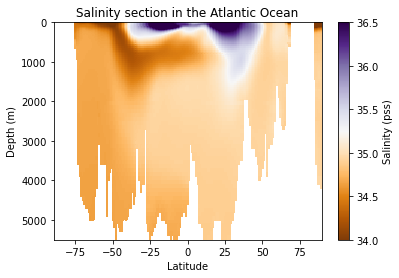

In [5]:
idx_section=29
section=plt.figure()
ax=plt.axes()
c=ax.pcolor(lat,depth,s_an[:,:,idx_section],vmin=34,vmax=36.5,cmap='PuOr')
cbar=section.colorbar(c)
cbar.set_label('Salinity (pss)', rotation=90)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude')
ax.set_title('Salinity section in the Atlantic Ocean')
plt.show

Décrivez cette section de salinité. Que remarquez vous ? Quels sont les structures les plus remarquables ? Que signifient-elles ?

- Calcul de la température potentielle

Le code court suivant calcule la température potentielle sur la section choisie. Plottez la section de la température, ou de la température potentielle.

In [20]:
ptmp=np.zeros((len(depth),len(lat)))
              
for i in range(len(lat)):
    for j in range(len(depth)):
        ptmp[j,i]=gsw.ptmp(s_an[j,i,idx_section],t_an[j,i,idx_section],depth[j],0)

<ipython-input-20-4a9fbea1461d>:5: UserWarning: Warning: converting a masked element to nan.
  ptmp[j,i]=gsw.ptmp(s_an[j,i,idx_section],t_an[j,i,idx_section],depth[j],0)


### Coder ici la section de température

Décrivez cette section de température. Que remarquez vous ? Quels sont les structures les plus remarquables ? Que signifient-elles ?

## Visualiser les données : Echelle locale

Pour aller encore plus en détail, on va descendre à l'échelle du profil. C'est à dire que l'on va choisir une longitude et une latitude particulière, et regarder la variation de la température et de la salinité à cette position là. Vous pouvez, à partir de la section, sélectionner les points qui vous paraissent intéressants à regarder. Ici un exemple est pris dans l'atlantique. La variable idx_profil représente ici la position dans le vecteur latitude de la latitude que l'on veut fixer, ici 9.5°S. Codez le profil de température potentielle. Qu'elle est la différence avec la température ? 

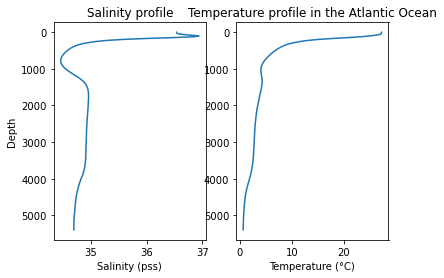

In [7]:
idx_profil=80;
profils, axs=plt.subplots(1,2);
axs[0].plot(s_an[:,idx_profil,idx_section],depth)
axs[0].invert_yaxis()
axs[0].set_ylabel('Depth')
axs[0].set_xlabel('Salinity (pss)')
axs[0].set_title('Salinity profile')
axs[1].plot(t_an[:,idx_profil,idx_section],depth)
axs[1].invert_yaxis()
axs[1].set_xlabel('Temperature (°C)')
axs[1].set_title('Temperature profile in the Atlantic Ocean')
plt.show()



### Diagrame T-S

Une approche classique pour regarder les masses d'eaux est de représenter les deux propriétés clés l'une en fonction de l'autre. Le diagramme T-S est donc l'un des objets les plus utilisé de l'océanographie pour caractériser les masses d'eaux et leur mélange. Vous pourrez trouver des informations sur les diagrames T-S dans les livres PDF mis à disposition par Sabrina. 
Petit récapitulatif des diagrames T-S :
- Si une masse d'eau est homogène, elle sera représentée par un point sur le diagramme T-S.
- Le mélange entre deux masses d'eau est généralement représenté par une droite

Le script ci-dessous est un peu plus complexe, il sert à créer le diagramme, et principalement à créer et représenter les isopycnes sur la figure. Les variables temp et salt représentes le profil de température et de salinité au point de latitude et longitude choisi dans idx_profil et idx_section. Remplacez la température par la température potentielle.

Text(0, 0.5, 'Temperature (°C)')

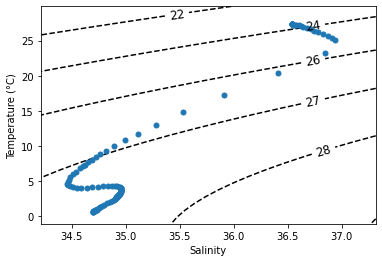

In [19]:
temp  = t_an[:,idx_profil,idx_section]
salt  = s_an[:,idx_profil,idx_section]

# Figure out boudaries (mins and maxs)
smin = salt.min() - (0.01 * salt.min())
smax = salt.max() + (0.01 * salt.max())
tmin = temp.min() - (0.1 * temp.max())
tmax = temp.max() + (0.1 * temp.max())
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.dens(si[i],ti[j],0)
 
dens = dens - 1000
 
# Plot data ***********************************************
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level
 
ax1.plot(salt,temp,'o',markersize=5)
 
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature (°C)')